### Classificação Árvore de Decisão - Decision Tree 

In [1]:
# install.packages("rpart", dependencies=T)
library(rpart)

In [2]:
credito = read.csv(file.choose(), sep=",", header=T) # credit.csv
head(credito)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,...,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>
1,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
2,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
3,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
4,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
5,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
6,'no checking',36,'existing paid',education,9055,'no known savings',1<=X<4,2,'male single',none,...,'no known property',35,none,'for free',1,'unskilled resident',2,yes,yes,good


In [3]:
amostra = sample(2,1000,replace=T, prob=c(0.7,0.3))
creditotreino = credito[amostra==1,]
creditoteste = credito[amostra==2,]
dim(creditotreino)
dim(creditoteste)

[1] 728  21

[1] 272  21

In [4]:
arvore = rpart(class ~ . , data=creditotreino, method="class")
arvore

n= 728 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 728 216 good (0.29670330 0.70329670)  
    2) checking_status=<0,0<=X<200 403 177 good (0.43920596 0.56079404)  
      4) duration>=33 85  29 bad (0.65882353 0.34117647)  
        8) savings_status=<100,100<=X<500 70  18 bad (0.74285714 0.25714286)  
         16) age< 26.5 17   0 bad (1.00000000 0.00000000) *
         17) age>=26.5 53  18 bad (0.66037736 0.33962264)  
           34) installment_commitment>=3.5 29   5 bad (0.82758621 0.17241379) *
           35) installment_commitment< 3.5 24  11 good (0.45833333 0.54166667)  
             70) duration>=47.5 8   1 bad (0.87500000 0.12500000) *
             71) duration< 47.5 16   4 good (0.25000000 0.75000000) *
        9) savings_status='no known savings',500<=X<1000 15   4 good (0.26666667 0.73333333) *
      5) duration< 33 318 121 good (0.38050314 0.61949686)  
       10) credit_history='all paid','no credits/all paid' 39  12 bad (0.69230769 0.307

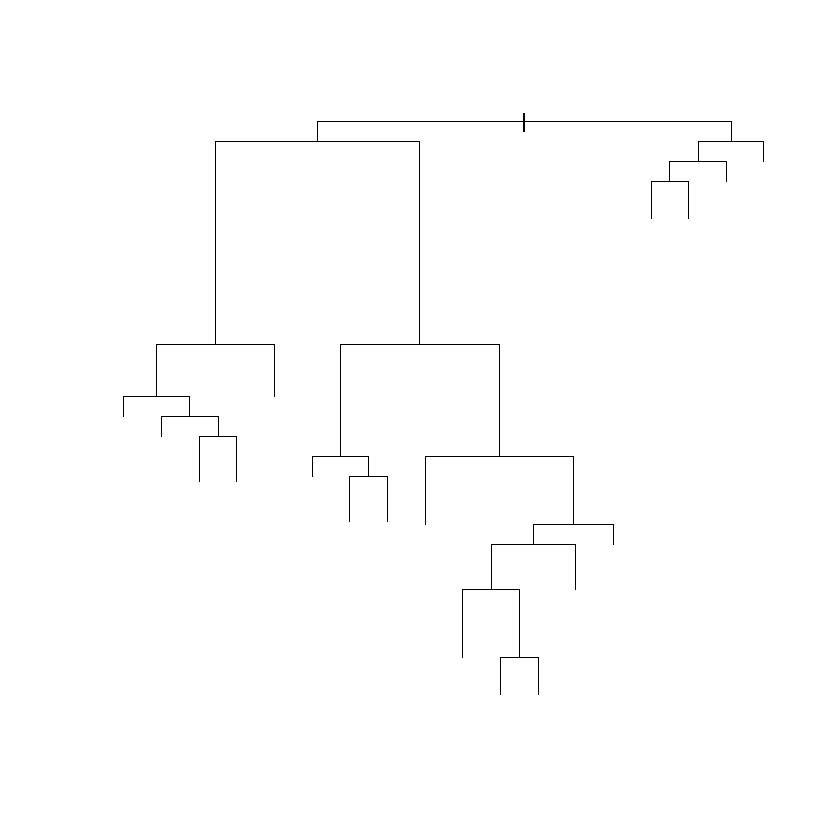

In [5]:
plot(arvore)

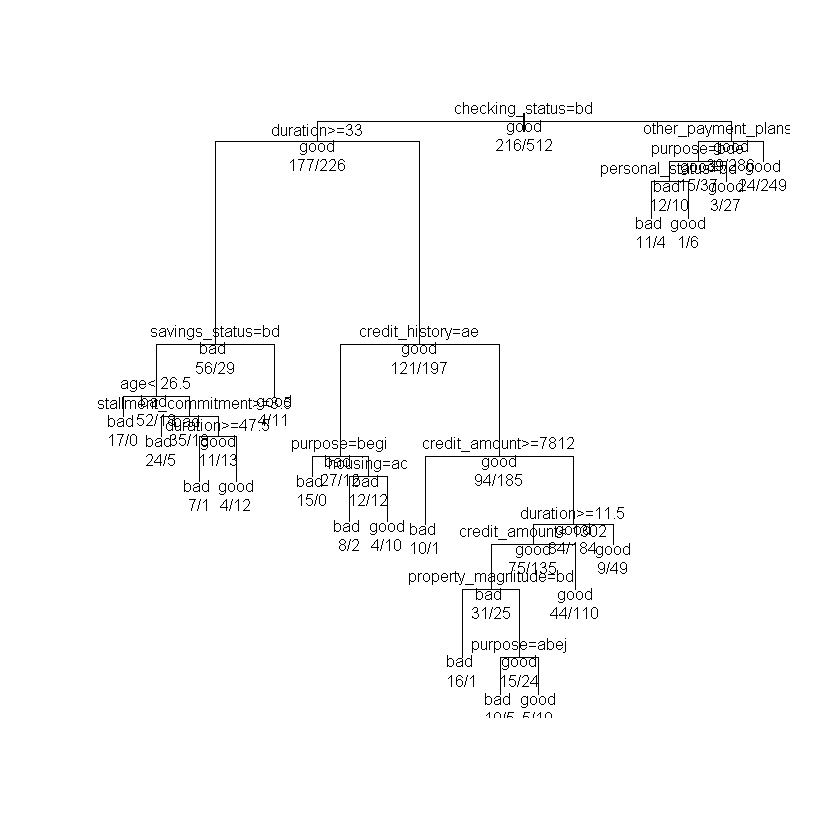

In [6]:
plot(arvore)
text(arvore, use.n=T, all=T, cex=.8)

In [7]:
teste = predict(arvore, newdata=creditoteste)
head(teste)

,bad,good
4,0.25000000,0.7500000
5,0.28571429,0.7142857
8,0.25000000,0.7500000
10,0.28571429,0.7142857
13,0.28571429,0.7142857
17,0.08791209,0.9120879


In [8]:
cred = cbind(creditoteste, teste)
fix(cred)
head(cred)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,bad,good
,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,...,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>
,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,none,'for free',1,skilled,2,none,yes,good,0.25000000,0.7500000
5,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,none,'for free',2,skilled,2,none,yes,bad,0.28571429,0.7142857
8,0<=X<200,36,'existing paid','used car',6948,<100,1<=X<4,2,'male single',none,...,none,rent,1,'high qualif/self emp/mgmt',1,yes,yes,good,0.25000000,0.7500000
10,0<=X<200,30,'critical/other existing credit','new car',5234,<100,unemployed,4,'male mar/wid',none,...,none,own,2,'high qualif/self emp/mgmt',1,none,yes,bad,0.28571429,0.7142857
13,0<=X<200,12,'existing paid',radio/tv,1567,<100,1<=X<4,1,'female div/dep/mar',none,...,none,own,1,skilled,1,yes,yes,good,0.28571429,0.7142857
17,'no checking',24,'critical/other existing credit',radio/tv,2424,'no known savings',>=7,4,'male single',none,...,none,own,2,skilled,1,none,yes,good,0.08791209,0.9120879


In [9]:
cred["Result"] = ifelse(cred$bad >= 0.5, "bad", "good")
head(cred)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,bad,good,Result
,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,...,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<chr>
,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'for free',1,skilled,2,none,yes,good,0.25000000,0.7500000,good
5,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'for free',2,skilled,2,none,yes,bad,0.28571429,0.7142857,good
8,0<=X<200,36,'existing paid','used car',6948,<100,1<=X<4,2,'male single',none,...,rent,1,'high qualif/self emp/mgmt',1,yes,yes,good,0.25000000,0.7500000,good
10,0<=X<200,30,'critical/other existing credit','new car',5234,<100,unemployed,4,'male mar/wid',none,...,own,2,'high qualif/self emp/mgmt',1,none,yes,bad,0.28571429,0.7142857,good
13,0<=X<200,12,'existing paid',radio/tv,1567,<100,1<=X<4,1,'female div/dep/mar',none,...,own,1,skilled,1,yes,yes,good,0.28571429,0.7142857,good
17,'no checking',24,'critical/other existing credit',radio/tv,2424,'no known savings',>=7,4,'male single',none,...,own,2,skilled,1,none,yes,good,0.08791209,0.9120879,good


In [10]:
confusao = table(cred$class, cred$Result)

In [11]:
taxaacerto = (confusao[1] + confusao[4]) / sum(confusao)
taxaacerto

[1] 0.7463235

In [12]:
taxaerro = (confusao[2] + confusao[3]) / sum(confusao)
taxaerro 

# taxaerro = 1 - taxaacerto

[1] 0.2536765